In [29]:
import tskit
import pandas as pd
import numpy as np
import pyslim
import msprime
import matplotlib.pyplot as plt

from kasper_stats import kasper_run_stat, kasper_comb_stat
%config InlineBackend.figure_format = 'retina'

In [30]:

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])


In [31]:
import seaborn as sns
amplicon_intervals = [(2003, 3003), (10003003, 10004003), (20004003, 20005003)]
amplicon_average_positions = [(sum(e) // 2) for e in amplicon_intervals]

In [32]:
from statsmodels.nonparametric.smoothers_lowess import lowess
def add_lowess(x, y, ax=None, is_sorted=True, frac=0.005, it=0, **kwargs):
    "Add a lowess curve to the plot"
    if ax is None:
        ax = plt.gca() 
    filtered = lowess(y, x, is_sorted=is_sorted, frac=frac, it=it)
    ax.plot(filtered[:,0], filtered[:,1], **kwargs)

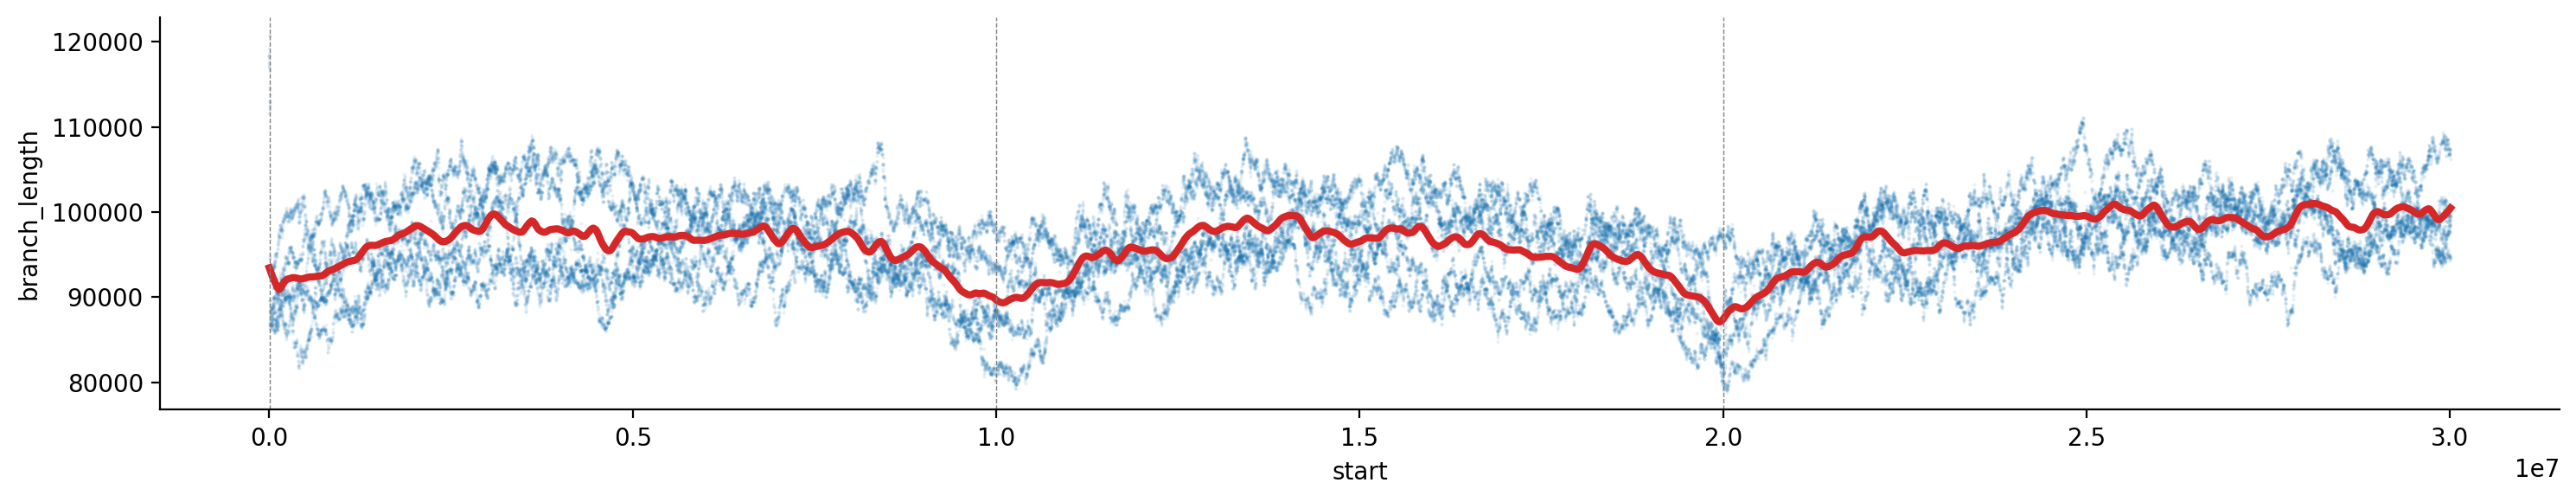

In [33]:
dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_2_{i}_windowstats.h5')
    df['replicate'] = i
    dfs.append(df)
window_stats_df = pd.concat(dfs)

dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_2_{i}_treestats.h5')
    df['replicate'] = i
    dfs.append(df)
tree_stats_df = pd.concat(dfs)

g = sns.FacetGrid(tree_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'branch_length', s=1, color='C0', marker='.', alpha=0.1)
g.map(add_lowess, "start", 'branch_length', frac=0.01, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

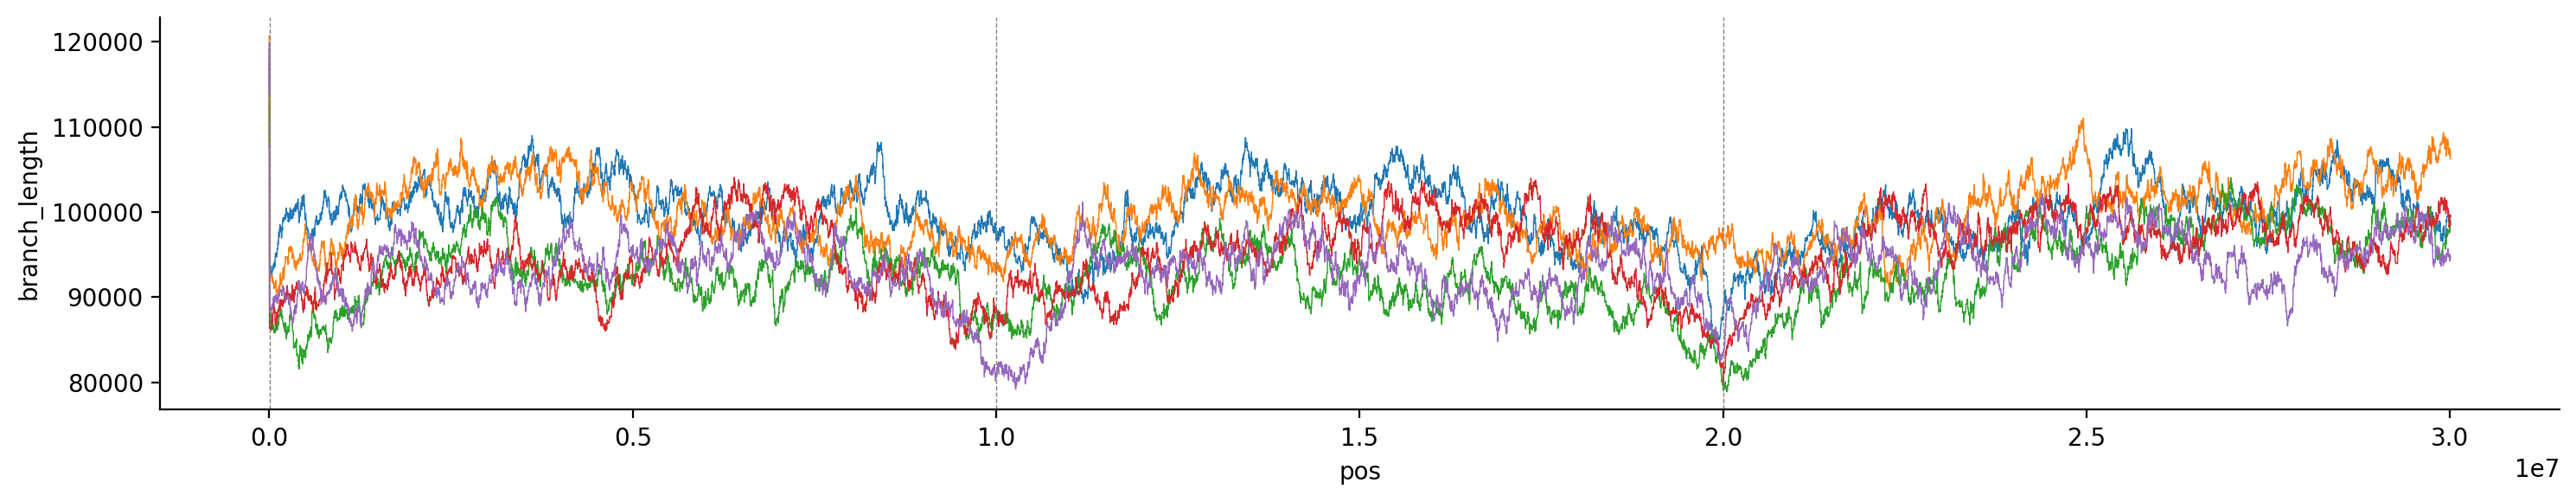

In [34]:
g = sns.FacetGrid(stairs(tree_stats_df), hue="replicate", height=3, aspect=5)
g.map(plt.plot, "pos", 'branch_length', linewidth=0.5)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

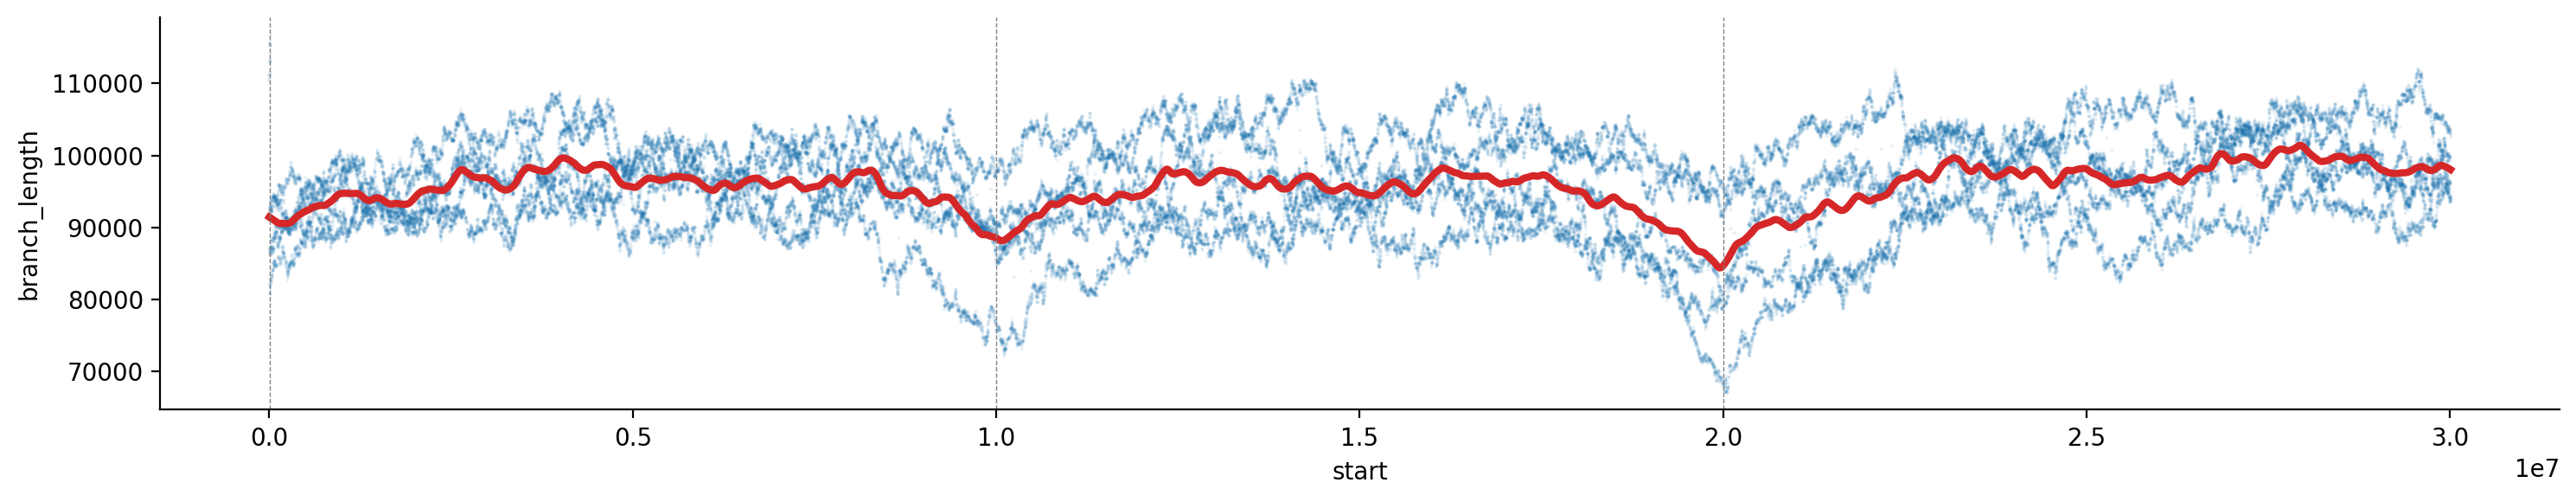

In [35]:
dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_20_{i}_windowstats.h5')
    df['replicate'] = i
    dfs.append(df)
window_stats_df = pd.concat(dfs)

dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_20_{i}_treestats.h5')
    df['replicate'] = i
    dfs.append(df)
tree_stats_df = pd.concat(dfs)

g = sns.FacetGrid(tree_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'branch_length', s=1, color='C0', marker='.', alpha=0.1)
g.map(add_lowess, "start", 'branch_length', frac=0.01, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

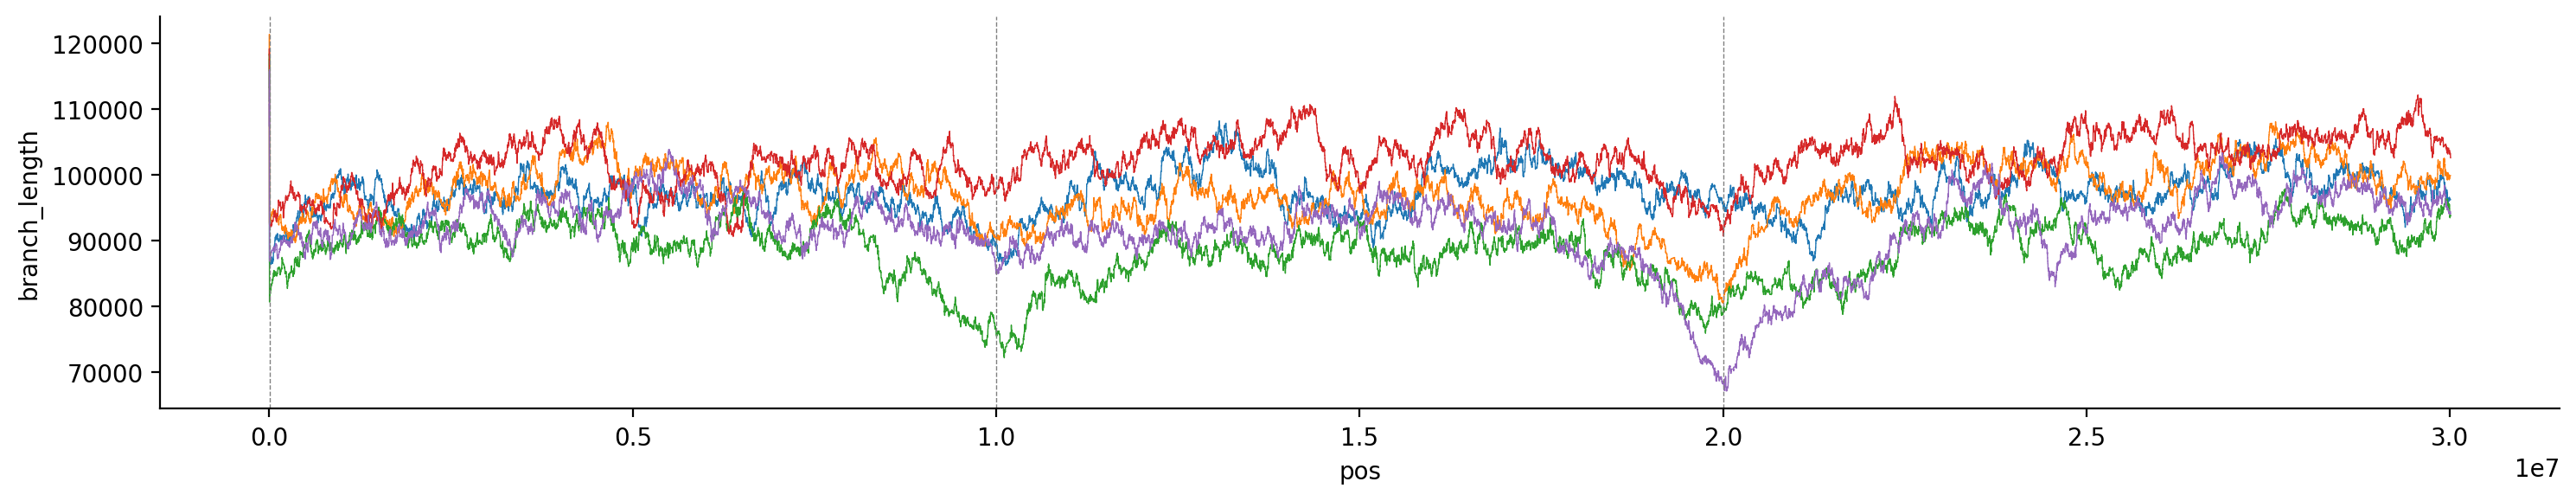

In [36]:
g = sns.FacetGrid(stairs(tree_stats_df), hue="replicate", height=3, aspect=5)
g.map(plt.plot, "pos", 'branch_length', linewidth=0.5)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

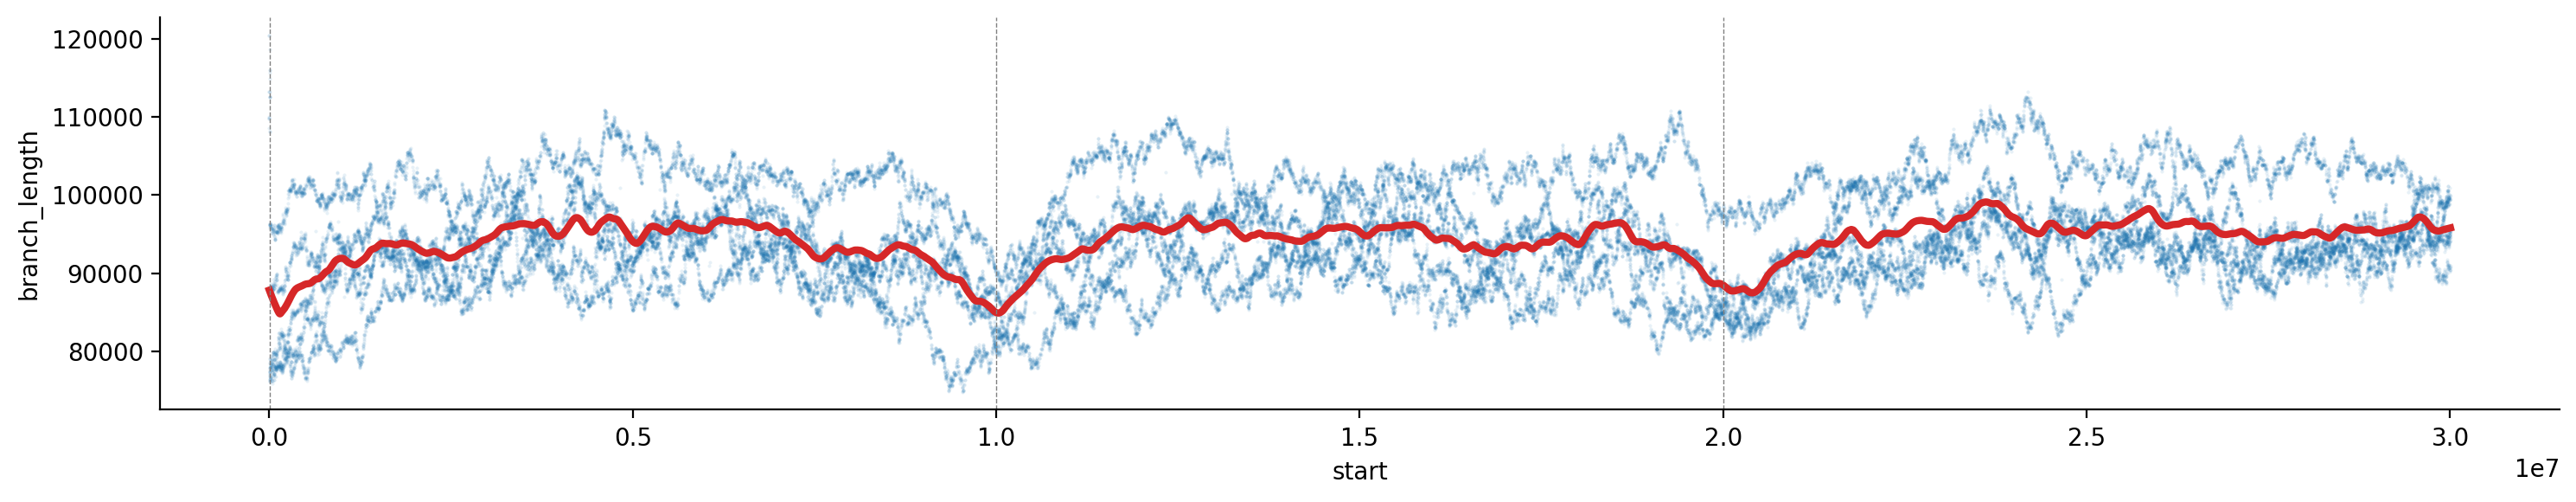

In [37]:
dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_200_{i}_windowstats.h5')
    df['replicate'] = i
    dfs.append(df)
window_stats_df = pd.concat(dfs)

dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0.0000050000__r_0.0000000500__S_200_{i}_treestats.h5')
    df['replicate'] = i
    dfs.append(df)
tree_stats_df = pd.concat(dfs)

g = sns.FacetGrid(tree_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'branch_length', s=1, color='C0', marker='.', alpha=0.1)
g.map(add_lowess, "start", 'branch_length', frac=0.01, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

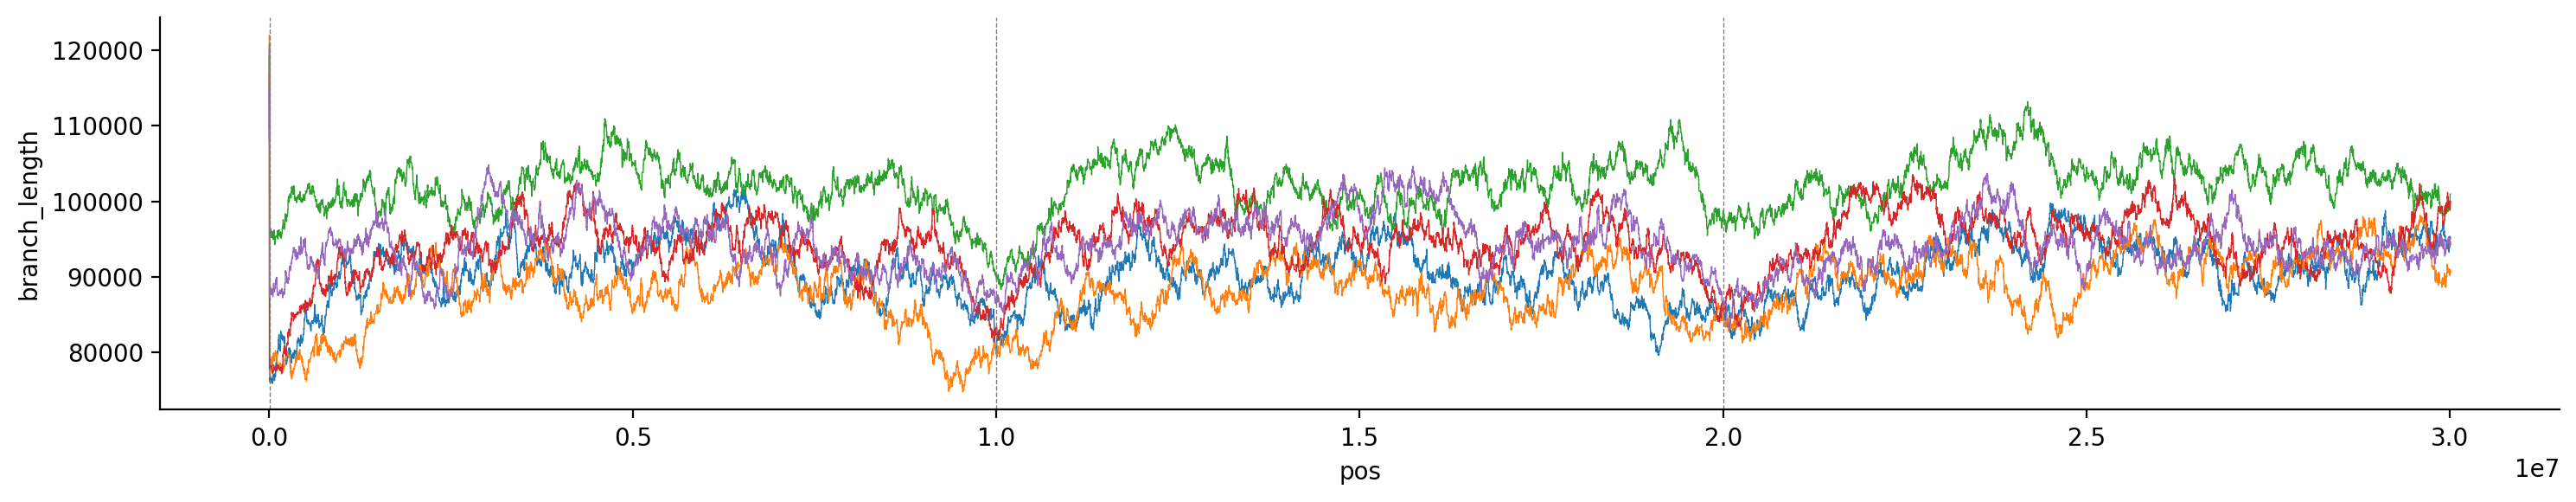

In [38]:
g = sns.FacetGrid(stairs(tree_stats_df), hue="replicate", height=3, aspect=5)
g.map(plt.plot, "pos", 'branch_length', linewidth=0.5)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

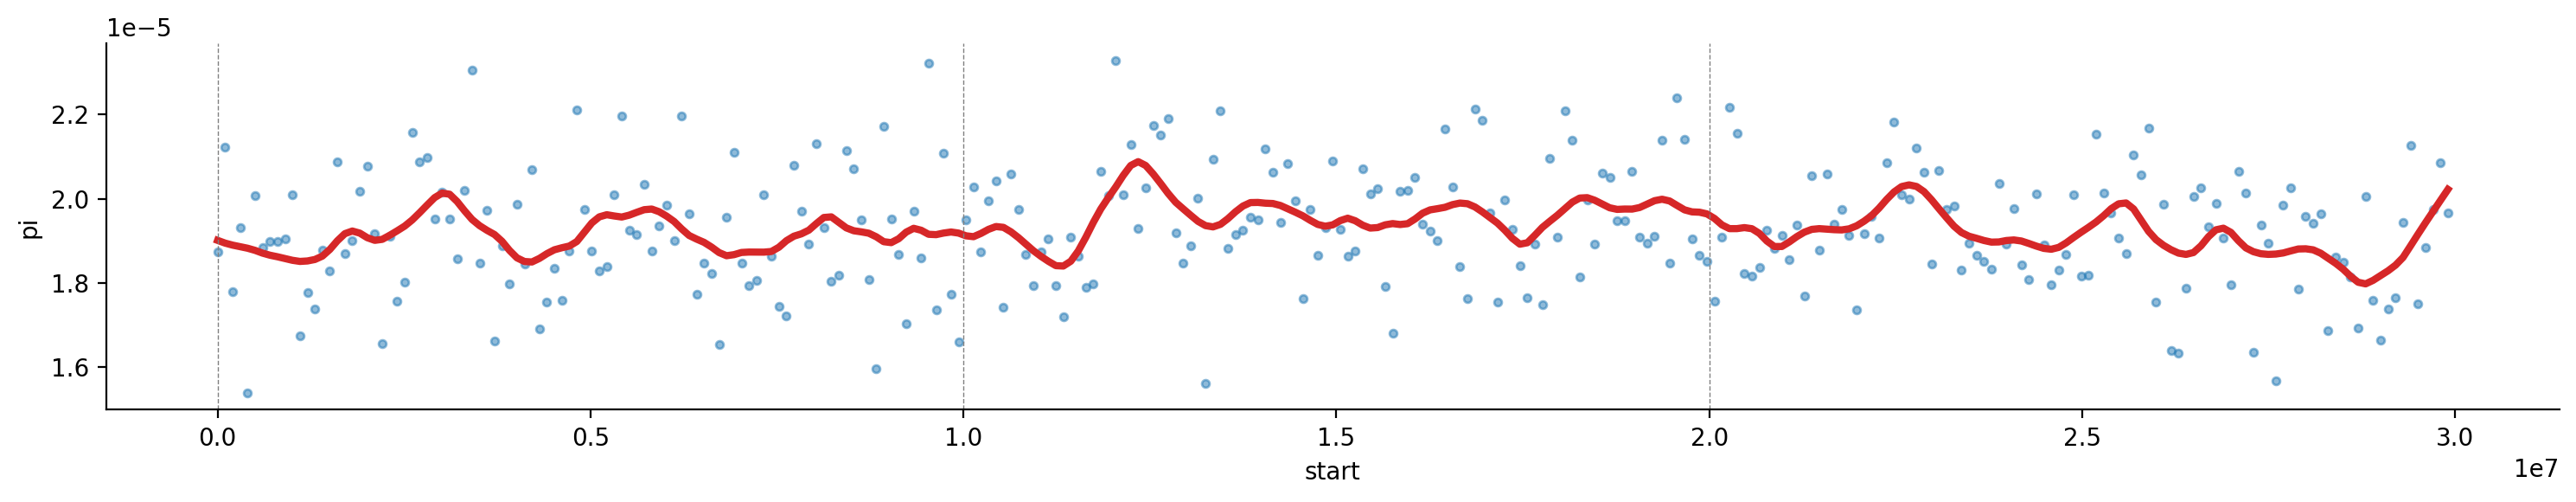

In [39]:
g = sns.FacetGrid(window_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'pi', s=10, color='C0', alpha=0.5)
g.map(add_lowess, "start", 'pi', frac=0.05, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

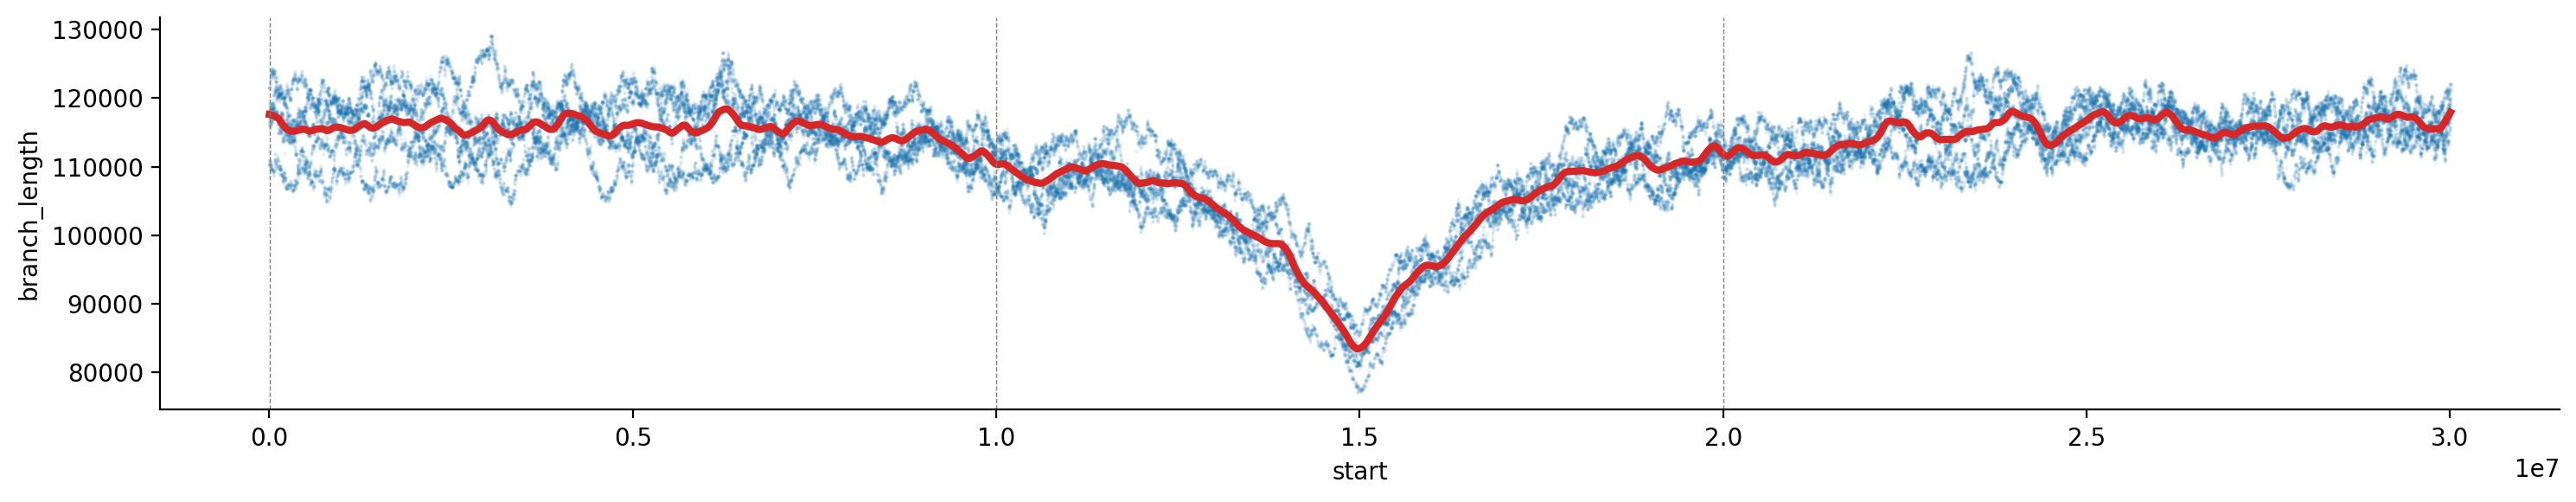

In [40]:
dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0__r_0.0000000500__S_0.1_{i}_windowstats.h5')
    df['replicate'] = i
    dfs.append(df)
window_stats_df = pd.concat(dfs)

dfs = []
for i in range(5):
    df = pd.read_hdf(f'../steps/processed_tree_seqs/1000/A_3__N_10000__u_0__r_0.0000000500__S_0.1_{i}_treestats.h5')
    df['replicate'] = i
    dfs.append(df)
tree_stats_df = pd.concat(dfs)

g = sns.FacetGrid(tree_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'branch_length', s=1, color='C0', marker='.', alpha=0.1)
g.map(add_lowess, "start", 'branch_length', frac=0.01, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

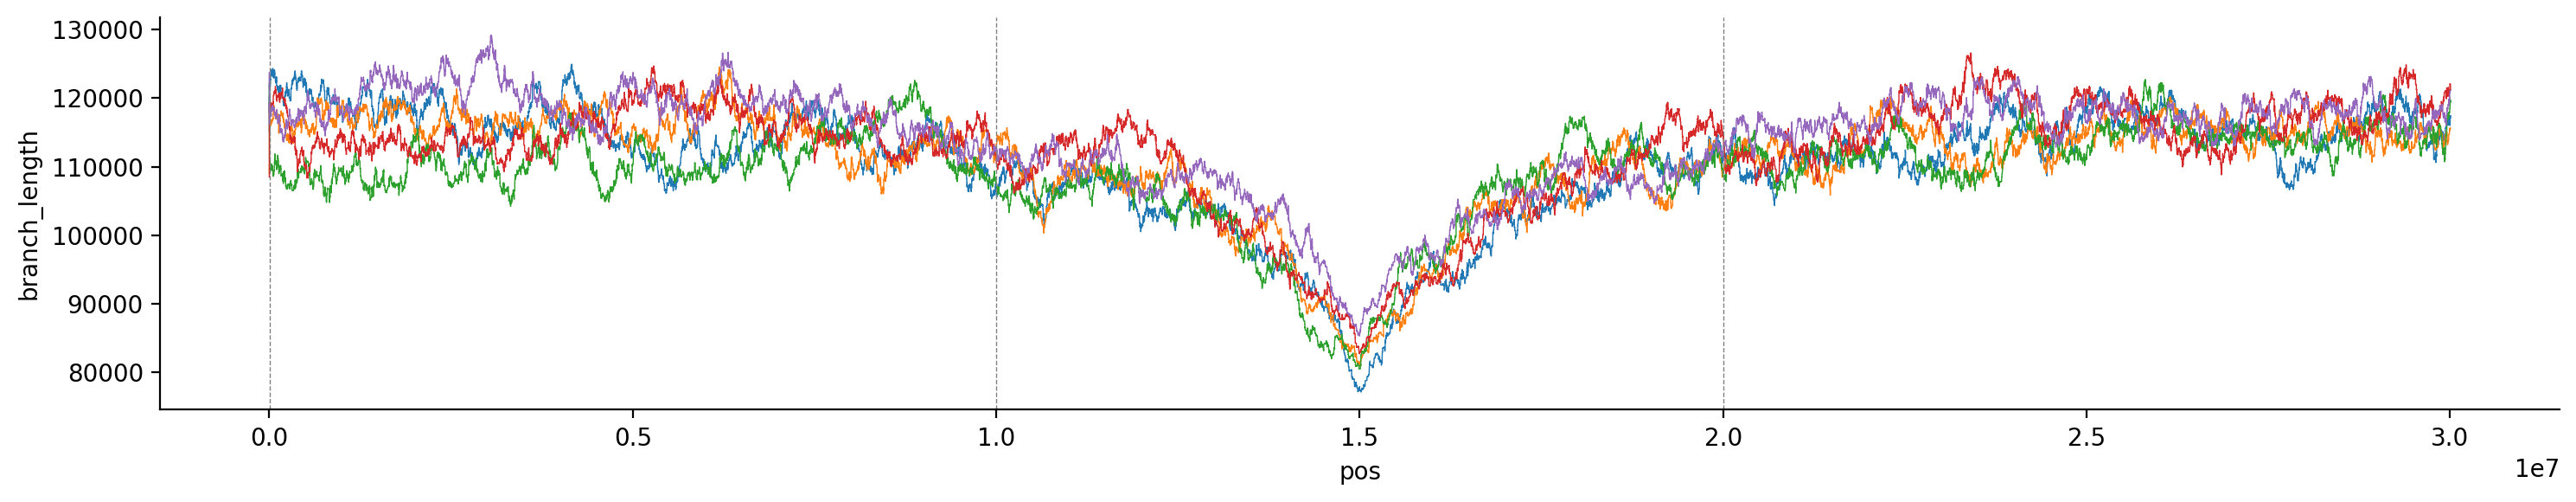

In [41]:
g = sns.FacetGrid(stairs(tree_stats_df), hue="replicate", height=3, aspect=5)
g.map(plt.plot, "pos", 'branch_length', linewidth=0.5)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;

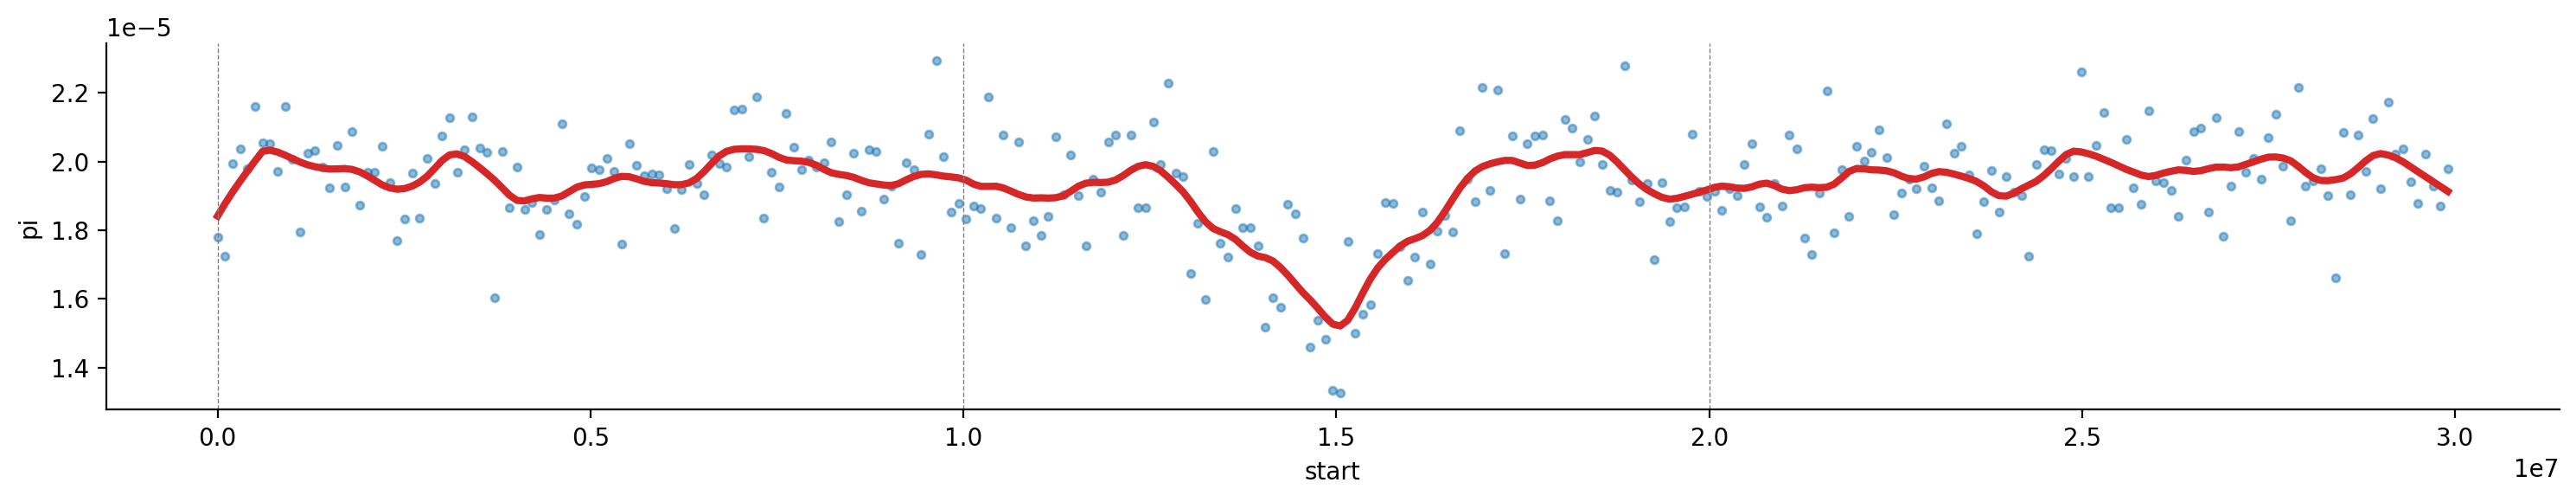

In [42]:
g = sns.FacetGrid(window_stats_df.groupby('pos').mean(), height=3, aspect=5)
g.map(plt.scatter, "start", 'pi', s=10, color='C0', alpha=0.5)
g.map(add_lowess, "start", 'pi', frac=0.05, is_sorted=False, color='C3', linewidth=3)
for axs in g.axes.flat:
    for vline in amplicon_average_positions:
        axs.axvline(x = vline, color='grey', linestyle='--', lw = 0.5)
g.tight_layout() ;